# Data

In [3]:
import pandas as pd

In [4]:
# Load the data
nifty_all_df = pd.read_csv('NIFTY50_all.csv')
nifty_all_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [5]:
# Selete tata steel data
nifty_tatasteel_df = nifty_all_df[nifty_all_df['Symbol'] == 'TATASTEEL']

In [6]:
# Select only open, high, low, close, and date columns
tatasteel_df = nifty_tatasteel_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [7]:
# Convert datetypes
tatasteel_df['Date'] = pd.to_datetime(tatasteel_df['Date'])
tatasteel_df['Open'] = pd.to_numeric(tatasteel_df['Open'], errors='coerce') # Coerce makes the errors NaN
tatasteel_df['High'] = pd.to_numeric(tatasteel_df['High'], errors='coerce')
tatasteel_df['Low'] = pd.to_numeric(tatasteel_df['Low'], errors='coerce')
tatasteel_df['Close'] = pd.to_numeric(tatasteel_df['Close'], errors='coerce')
tatasteel_df['Volume'] = pd.to_numeric(tatasteel_df['Volume'], errors='coerce')
# Reset index
tatasteel_df = tatasteel_df.reset_index(drop=True)
tatasteel_df.head()

C:\Users\katti\AppData\Local\Temp\ipykernel_17896\2916034704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatasteel_df['Date'] = pd.to_datetime(tatasteel_df['Date'])
C:\Users\katti\AppData\Local\Temp\ipykernel_17896\2916034704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tatasteel_df['Open'] = pd.to_numeric(tatasteel_df['Open'], errors='coerce') # Coerce makes the errors NaN
C:\Users\katti\AppData\Local\Temp\ipykernel_17896\2916034704.py:4: SettingWithCopyWarning: 
A value is trying to be set 

,Date,Open,High,Low,Close,Volume
0,2005-10-17,380.00,386.30,374.60,384.35,4618966
1,2005-10-18,386.85,388.55,364.10,374.85,3408087
2,2005-10-19,371.60,373.55,352.00,361.55,4549667
3,2005-10-20,365.30,371.85,351.50,358.60,4132203
4,2005-10-21,360.35,368.50,357.65,367.40,4355886


In [8]:
# Check data types
tatasteel_df.set_index('Date', inplace=True)
tatasteel_df.sort_index(inplace=True)
tatasteel_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2005-10-17,380.00,386.30,374.60,384.35,4618966
2005-10-18,386.85,388.55,364.10,374.85,3408087
2005-10-19,371.60,373.55,352.00,361.55,4549667
2005-10-20,365.30,371.85,351.50,358.60,4132203
2005-10-21,360.35,368.50,357.65,367.40,4355886


In [9]:
tatasteel_df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [10]:
# Save the data
tatasteel_df.to_csv('TATASTEEL.csv')

# Plot data

In [11]:
import plotly.graph_objects as go

In [12]:
# Plot the candlestick
fig = go.Figure(data=[go.Candlestick(
                    x=tatasteel_df.index,
                    open=tatasteel_df['Open'],
                    high=tatasteel_df['High'],
                    low=tatasteel_df['Low'],
                    close=tatasteel_df['Close'])
                ]
            )

fig.show()

# Env

In [13]:
import gym, gym_anytrading
import matplotlib.pyplot as plt

In [60]:
env = gym.make('stocks-v0', df=tatasteel_df, frame_bound=(5,10), window_size=0)

In [61]:
# env.prices, env.signal_features

In [62]:
env.action_space # Discrete(2) Buy or Sell

Discrete(2)

info {'total_reward': 0.0, 'total_profit': 1.0, 'position': 0}


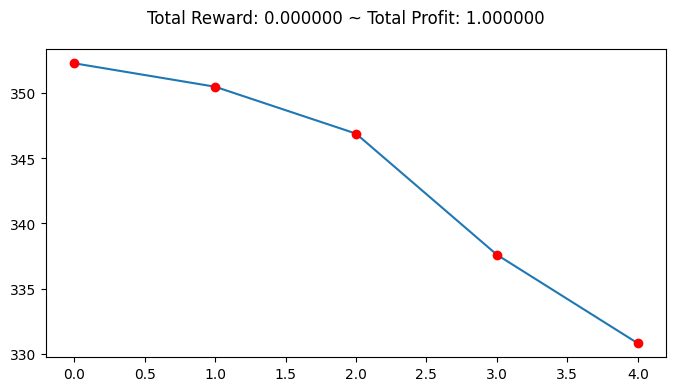

In [67]:
state = env.reset()
while True: 
    action = 0 # zero buy, one sell
    n_state, reward, done, info = env.step(action) # Take a random action
    if done: 
        print("info", info) # This is returned if we reach the end of the window
        break
        
plt.figure(figsize=(8,4))
plt.cla()
env.render_all()
plt.show()

# RL

In [1]:
from stable_baselines3 import A2C # A2C is a synchronous, deterministic variant of Asynchronous Advantage Actor Critic (A3C)
from stable_baselines3 import PPO # Proximal Policy Optimization (PPO) is a model-free reinforcement learning algorithm
from stable_baselines3 import DQN # Deep Q Network (DQN) algorithm

from stable_baselines3.common.evaluation import evaluate_policy # To evaluate the policy
from stable_baselines3.common.vec_env import DummyVecEnv # To create a vectorized environment

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [69]:
env_maker = lambda: gym.make('stocks-v0', df=tatasteel_df, frame_bound=(100,1000), window_size=5)
vec_env = DummyVecEnv([env_maker])

c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning:

WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)

c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



In [70]:
# Available policies: https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html
model = PPO('MlpPolicy', vec_env, verbose=1, device='cpu')
model.learn(total_timesteps=10000000)

Using cpu device


c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.

c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.

c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning:

WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`

c:\Users\katti\Desktop\Python-Projects\Tuts_And_Projects\.venv\

-----------------------------
| time/              |      |
|    fps             | 1233 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 882         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015886262 |
|    clip_fraction        | 0.0544      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | 0.000305    |
|    learning_rate        | 0.0003      |
|    loss                 | 948         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00252    |
|    value_loss           | 1.82e+03    |
-----------------------------------------
----------------------------------

KeyboardInterrupt: 

In [ ]:
model.save("ppo_tatasteel_460K")

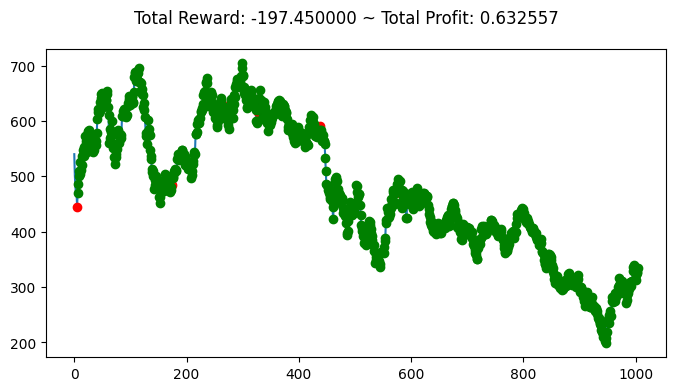

In [ ]:
test_env = gym.make('stocks-v0', df=tatasteel_df, frame_bound=(1000,2000), window_size=5)
state = test_env.reset() # Reset the environment to the initial state

while True:
    action, _states = model.predict(state) # Take action from the trained model
    n_state, reward, done, info = test_env.step(action) # Take the action
    if done: 
        break
plt.figure(figsize=(8,4))
plt.cla()
test_env.render_all()
plt.show()